In [1]:
%load_ext autoreload
%autoreload 1
%aimport resource_networks
%aimport network_manipulation 


from resource_networks import *
from network_manipulation import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 12
%matplotlib inline

import scipy
import cairosvg
import imageio

# import plotly.graph_objs as go
# import plotly.express as px

In [2]:
from scipy.linalg import null_space

In [3]:
%%html
<style>
/* Any CSS style can go in here. */
.dataframe th {
    font-size: 14px;
}
.dataframe td {
    font-size: 14px;
}
</style>


In [15]:
np.isclose(np.array([1, 2, 0.00000000001]), 0)

array([False, False,  True])

In [29]:
np.array([1, 2]).reshape((-1, 1))*np.array([[1, 2], [3, 4]])

array([[1, 2],
       [6, 8]])

In [37]:
n = 3
G2 = ResourceDiGraph(nx.fast_gnp_random_graph(n, 0.4, directed=True))
sim = G2.run_simulation(np.random.randint(10, 13, size=n), 40)
plot_simulation(G2, sim)
# sim.arr

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


interactive(children=(IntSlider(value=0, description='№ of iteration', max=39), Output()), _dom_classes=('widg…

In [17]:
np.inf == np.inf

True

In [9]:
sim = G2.run_simulation([10, 10, 10, 10], 150)
plot_simulation(G2, sim)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=149), Output()), _dom_classes=('wid…

In [10]:
nx.to_numpy_array(G2.G, dtype=int)[[0, 2, 1, 3]][:, [0, 2, 1, 3]]

array([[0, 3, 1, 0],
       [4, 0, 1, 7],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

In [11]:
ig = np.array([
       [0, 0, 2, 0], #если заменить 2 на 1, то аттрактором станет другая вершина!
       [0, 0, 0, 4], 
       [3, 2, 0, 0],
       [1, 5, 0, 0]])
interesting_graph = ResourceDiGraph(nx.from_numpy_array(
    ig,
    create_using=nx.DiGraph))
sim = interesting_graph.run_simulation([20, 10, 6, 12], 200)
plot_simulation(interesting_graph, sim)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=199), Output()), _dom_classes=('wid…

import pickle
with open('interesting_networks/long_transfer.pickle', 'wb') as f:
    pickle.dump(G2, f)

with open('interesting_networks/long_transfer.pickle', 'rb') as f:
    some_network = pickle.load(f)

In [10]:
M = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [3, 1, 1, 1, 1],
    [4, 1, 1, 1, 1],
    [5, 1, 1, 1, 1]
])
G = ResourceDiGraph(nx.from_numpy_matrix(M, create_using=nx.DiGraph))
sim = G.run_simulation([0, 40, 0, 0, 0], 32)
plot_simulation(G, sim, scale=1.5)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=31), Output()), _dom_classes=('widg…

In [11]:
G.stochastic_matrix()

array([[0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.42857143, 0.14285714, 0.14285714, 0.14285714, 0.14285714],
       [0.5       , 0.125     , 0.125     , 0.125     , 0.125     ],
       [0.55555556, 0.11111111, 0.11111111, 0.11111111, 0.11111111]])

### Simple network

In [9]:
G_ = ResourceDiGraph(nx.from_numpy_array(np.array([
    [0, 1, 0],
    [0, 0, 2],
    [3, 0, 0]
]), create_using=nx.DiGraph))
with open('/home/heinwol/Documents/WinDocs/work/ipu/report 01.02.22/3.svg', 'w') as f:
    f.write(G_.plot().data)

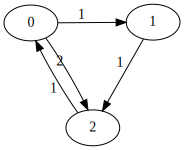

In [2]:
G = ResourceDiGraph(nx.from_numpy_array(np.array([
    [0, 1, 2],
    [0, 0, 1],
    [1, 0, 0]
]), create_using=nx.DiGraph))
G.plot()

In [107]:
G = ResourceDiGraphWithIncome(nx.from_numpy_array(np.array([
    [0, 4, 5],
    [0, 0, 4],
    [3, 0, 0]
]), create_using=nx.DiGraph))
sim = G.run_simulation([0, 20, 0], 26)
plot_simulation(G, sim)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=25), Output()), _dom_classes=('widg…

In [159]:
G2 = ResourceDiGraphWithIncome(nx.from_numpy_array(np.array([
    [0, 4, 5],
    [0, 0, 6],
    [10, 0, 0]
]), create_using=nx.DiGraph))
sim = G2.run_simulation([0, 30, 0], 50)
plot_simulation(G2, sim)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=49), Output()), _dom_classes=('widg…

In [156]:
G2.T()

22.0

In [131]:
G2.r_out() / G2.one_limit_state()

array([22.        , 33.        , 24.44444444])

In [158]:
G2.r_out(), G2.one_limit_state()

(array([ 9,  6, 10]), array([0.40909091, 0.18181818, 0.40909091]))

In [50]:
import io

In [51]:
f = io.StringIO('test')

In [59]:
plotted = G.plot_with_states(sim)[0]

In [ ]:
# writer.append_data()

In [88]:
path = '/home/heinwol/Documents/WinDocs/work/9_sem/nir_resource1/presentation/data/'
arr = []
# writer = imageio.get_writer(path + 'test2.mp4', format='FFMPEG', mode='I', fps=1)
for i, it in enumerate(G.plot_with_states(sim)):
    cairosvg.svg2png(bytestring=it.data, write_to= path + 'temp.png', dpi=200)
    arr.append(imageio.imread(path + 'temp.png'))
#     writer.append_data(imageio.imread(path + 'temp.png'))
imageio.mimsave(path + 'second.gif', arr, fps=1)
# writer.close()
# cairosvg.svg2png(bytestring=it.data, write_to= path + f'first-{i}.png')

In [41]:
with open('/home/heinwol/Documents/WinDocs/work/9_sem/nir_resource1/data/example1-4.svg', 'w') as f:
    f.write(G.plot_with_states(sim)[-1].data)

In [42]:
print(simple_protocol(sim).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
t  &           &           &           \\
\midrule
0  &  0.000000 &  0.000000 &  0.000000 \\
1  &  0.500000 &  0.500000 &  0.500000 \\
2  &  0.750000 &  0.472222 &  1.027778 \\
3  &  1.152778 &  0.458333 &  1.013889 \\
4  &  1.076389 &  0.574846 &  1.161265 \\
5  &  1.192515 &  0.509645 &  1.204090 \\
6  &  1.219715 &  0.545632 &  1.187779 \\
7  &  1.195591 &  0.549908 &  1.231064 \\
8  &  1.234970 &  0.535280 &  1.218031 \\
9  &  1.219985 &  0.550829 &  1.223328 \\
10 &  1.224304 &  0.543192 &  1.229574 \\
11 &  1.230063 &  0.544623 &  1.223849 \\
12 &  1.224093 &  0.546939 &  1.228236 \\
13 &  1.228358 &  0.544164 &  1.227113 \\
14 &  1.227174 &  0.545998 &  1.226646 \\
15 &  1.226676 &  0.545441 &  1.227791 \\
16 &  1.227807 &  0.545205 &  1.226943 \\
17 &  1.226951 &  0.545699 &  1.227327 \\
18 &  1.227331 &  0.545315 &  1.227343 \\
19 &  1.227344 &  0.545482 &  1.227168 \\
20 &  1.227169 &  0.545487 &  1.2273

In [13]:
null_space((G.stochastic_matrix() - np.eye(3)).T)

array([[-0.6882472 ],
       [-0.22941573],
       [-0.6882472 ]])

In [14]:
sim = G.run_simulation([1, 0, 0], 40)
plot_simulation(G, sim)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=39), Output()), _dom_classes=('widg…

In [15]:
prot = simple_protocol(sim)
# prot.diff().abs().sum(axis=1).diff()
prot

,0,1,2
t,,,
0,1.000000,0.000000,0.000000
1,0.000000,0.333333,0.666667
2,0.666667,0.000000,0.333333
3,0.333333,0.222222,0.444444
4,0.444444,0.111111,0.444444
5,0.444444,0.148148,0.407407
6,0.407407,0.148148,0.444444
7,0.444444,0.135802,0.419753
8,0.419753,0.148148,0.432099


---

---